In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./mnist_test.csv")

In [3]:
Y = data["label"].values
X = data.values
X = X[:,1:]
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

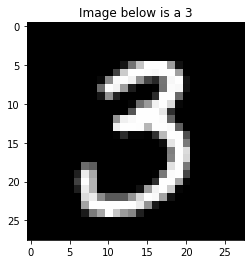

In [4]:
plt.title("Image below is a " + str(Y[90]))
plt.imshow(X[90].reshape(28,28),cmap="gray")
plt.show()

In [5]:
X = X.reshape((-1,28*28))
X.shape

(10000, 784)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()

In [8]:
X_ = sc.fit_transform(X)

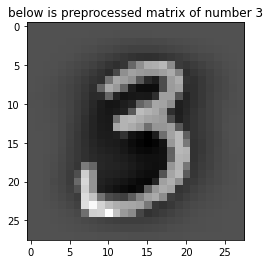

In [9]:
plt.title("below is preprocessed matrix of number " + str(Y[90])) #preprocessed means that now the mean is 0 and std = 1
plt.imshow(X_[90].reshape(28,28),cmap="gray")
plt.show()

# PCA using SK Learn

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2) # here we are converting a 784D image in a 2d

In [12]:
z_pca = pca.fit_transform(X_)

In [13]:
z_pca.shape #converted 784 dimension of X_ to only 2 dimension

(10000, 2)

In [14]:
print(z_pca)

[[-5.45821531  6.41416877]
 [ 2.80444403 -8.02992873]
 [-7.41117628 -3.8636859 ]
 ...
 [-5.00430305  1.15363583]
 [-1.42109887 -4.42545239]
 [13.142801   -4.26123325]]


In [15]:
pca.explained_variance_ #explaining the 41% and 28% = 70% of total variance of the original data which is of 784 D
#Means compressing the 784d to 2d cost us loss of 30% data

array([41.39893397, 28.35105792])

# Custom PCA (Without using the Sci Kit)

In [16]:
#Step 2 : Compute the covariance matix

covar = np.dot(X_.T,X_) # gives covariance of features of X_ by taking dot product with its transpose
covar

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
covar.shape

(784, 784)

In [18]:
from numpy.linalg import svd

In [19]:
U , S , D = svd(covar) #decompose the covariance matrix in values defining the original values in other dimensions

In [20]:
U.shape

(784, 784)

In [21]:
Ured = U[:,:2]

In [22]:
print(Ured.shape,X_.shape)

(784, 2) (10000, 784)


In [23]:
z = np.dot(X_,Ured)

In [24]:
z # projection of X_ in  a 2 dimension

array([[  5.45831116,  -6.41400668],
       [ -2.80443233,   8.02885014],
       [  7.41124146,   3.86404387],
       ...,
       [  5.00435204,  -1.15364641],
       [  1.42085442,   4.42308066],
       [-13.14268302,   4.26280299]])

# Visualising the new dataset

In [26]:
new_dataset = np.hstack((z,Y.reshape(-1,1)))

In [29]:
df = pd.DataFrame(new_dataset,columns=["PCA1" , "PCA2" , "Label"])

In [30]:
df.head()

,PCA1,PCA2,Label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0


In [32]:
import seaborn as sns

<Figure size 1080x1080 with 0 Axes>

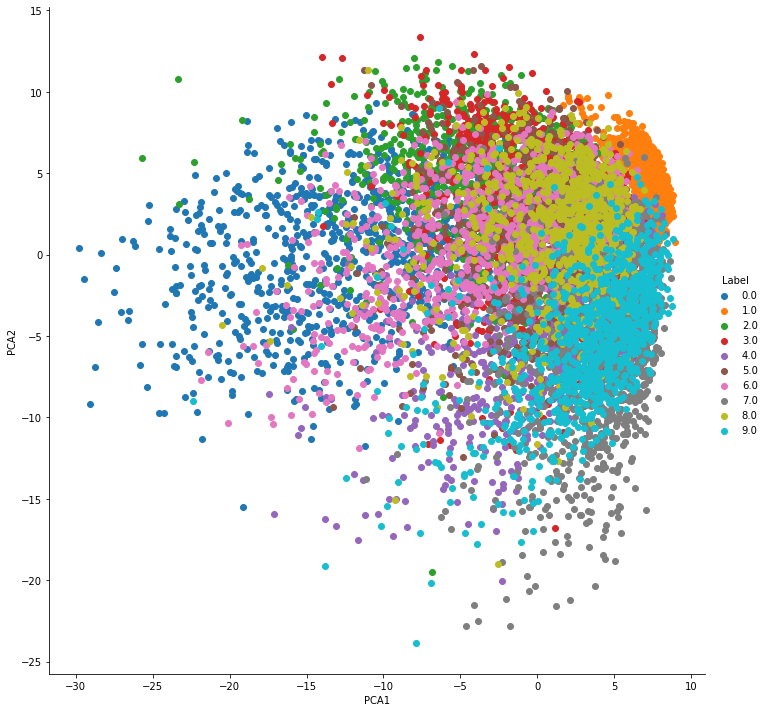

In [39]:
plt.figure(figsize=(15,15))
fg = sns.FacetGrid(df,hue="Label",height=10) #making a facet grid
fg.map(plt.scatter,"PCA1","PCA2") #to tell the sns to make a scatter plot we use map
fg.add_legend()
plt.show()

# Visualising the PCA with 784 Dimensions

In [41]:
pca = PCA() #we didnt provided the n_components so the dimension would be 784

In [45]:
pca.fit_transform(X_)

array([[-5.45831116e+00,  6.41400668e+00, -4.19942366e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.80443233e+00, -8.02885014e+00,  1.61857796e+01, ...,
        -9.65876319e-16, -2.96195423e-16,  2.22394697e-16],
       [-7.41124146e+00, -3.86404387e+00,  1.08959777e+00, ...,
         1.51604252e-15, -7.00705679e-17, -1.07231308e-16],
       ...,
       [-5.00435204e+00,  1.15364641e+00, -5.01710348e+00, ...,
         3.74959731e-19, -4.84675402e-17,  8.46835221e-18],
       [-1.42085442e+00, -4.42308066e+00, -7.00728815e+00, ...,
        -3.77878420e-17,  2.72161617e-17, -1.16329271e-17],
       [ 1.31426830e+01, -4.26280299e+00, -1.14624747e+00, ...,
        -3.05222545e-17, -2.58885833e-17,  6.09674504e-18]])

In [53]:
pcaRatio = pca.explained_variance_ratio_

In [57]:
cumm_sum = np.cumsum(pcaRatio)
cumm_sum

array([0.06196825, 0.10440571, 0.14485024, 0.17715614, 0.20470687,
       0.22879812, 0.24925102, 0.26808257, 0.28479108, 0.29996633,
       0.31468716, 0.32779648, 0.34034829, 0.35228998, 0.36373924,
       0.37468893, 0.38500726, 0.39494763, 0.4044137 , 0.41352917,
       0.42242401, 0.4310809 , 0.439552  , 0.44776835, 0.45563324,
       0.46333726, 0.47090331, 0.47823448, 0.48532264, 0.49215733,
       0.49884345, 0.5053854 , 0.51185667, 0.51807696, 0.52411842,
       0.53003733, 0.53585823, 0.54159029, 0.54724663, 0.55277341,
       0.55828517, 0.56376579, 0.56910488, 0.57430115, 0.5794262 ,
       0.58441841, 0.58939824, 0.59428976, 0.59907746, 0.60376681,
       0.6083714 , 0.61291288, 0.61737137, 0.62177213, 0.62611217,
       0.63034858, 0.63454437, 0.63868709, 0.64280317, 0.64685943,
       0.65086596, 0.65473127, 0.65854374, 0.66229743, 0.66596192,
       0.66957285, 0.67314234, 0.6766452 , 0.68011477, 0.68355655,
       0.68691319, 0.69025179, 0.69355391, 0.69682147, 0.70006

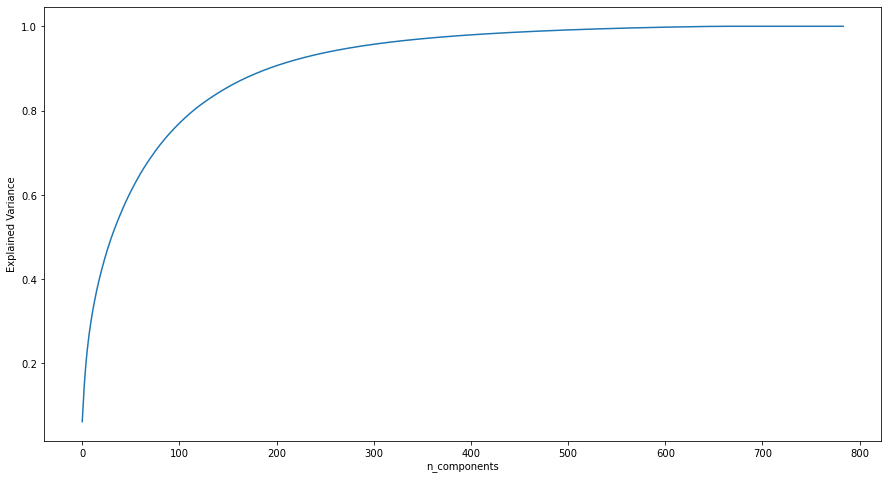

In [59]:
plt.figure(figsize=(15,8))
plt.plot(cumm_sum)
plt.xlabel("n_components")
plt.ylabel("Explained Variance")
plt.show()